# Data plotting

In [15]:
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from utils import plot_recessions, plot_pct_change


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

load_dotenv();

## United States

Data:
- PIB: Gross Domestic Product, Quarterly, Billions of Dollars [GDP](https://fred.stlouisfed.org/series/GDP).
- M3: [ShadowStats](http://www.shadowstats.com).
- Consumer Price Index for All Urban Consumers: All Items in U.S. City Average. Seasonally adjusted: [FRED CPIAUCSL](CPIAUCSL).


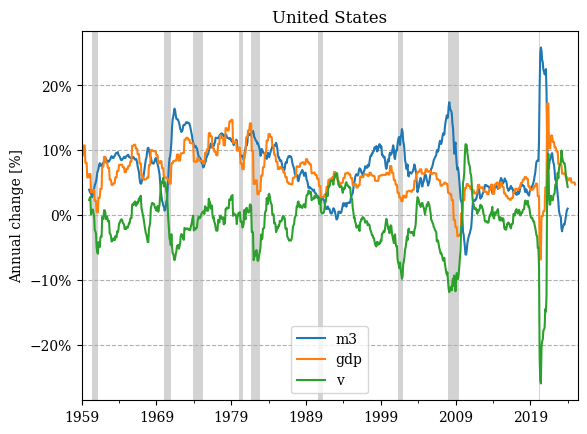

In [16]:
from data_preparation import get_us_data

df_us = get_us_data()
fig, ax = plot_pct_change(df_us, "United States")

## Euro area

Data: 
- GDP: two options:
    - Gross domestic product at market prices, Euro area 20 (fixed composition) as of 1 January 2023, Quarterly. [ECB](https://data.ecb.europa.eu/data/datasets/MNA/MNA.Q.Y.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.LR.N)
    - **Gross domestic product at market prices, Euro area (Member States and Institutions of the Euro Area) changing composition, Quarterly.** [ECB](https://data.ecb.europa.eu/data/datasets/MNA/MNA.Q.N.U2.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.V.N)
- M3: Monetary aggregate M3 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks), Euro area (changing composition), Monthly. [ECB](https://data.ecb.europa.eu/data/datasets/BSI/BSI.M.U2.N.V.M30.X.1.U2.2300.Z01.E).
- HICP: HICP - Overall index, Euro area (changing composition), Monthly. [ECB](https://data.ecb.europa.eu/data/datasets/ICP/ICP.M.U2.N.000000.4.INX).

/Users/miguel/workspace/money-growth/utils.py:90: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(


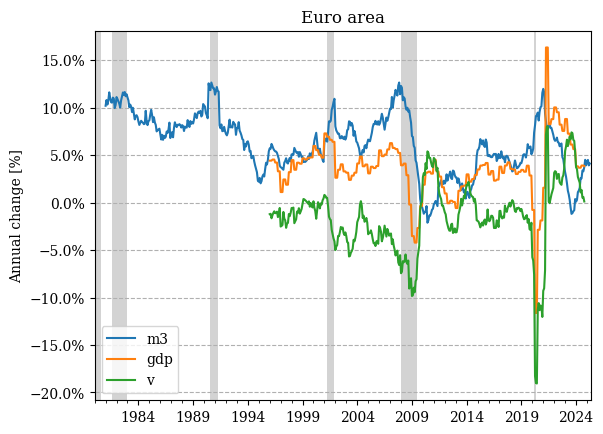

In [17]:
from data_preparation import get_eu_data

df_eu = get_eu_data()
fig, ax = plot_pct_change(df_eu, "Euro area")

## Switzerland

- Inflation according to the national consumer price index: both series are the same when percentage change is computed.
    - `plkopr{LD2010100}`: National index (Dec. 2020=100) [SNB](https://data.snb.ch/en/topics/uvo/cube/plkopr).
    - `plkoprinfla{TLK}`: Change [SNB](https://data.snb.ch/en/topics/uvo/cube/plkoprinfla).

Other options for inflation: 
- Eurostat HICP - monthly data (index). [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_midx/default/table?lang=en&category=prc.prc_hicp).
- IMF PCPIP: Inflation rate, averge consumer prices. [IMF](https://data.imf.org/?sk=4ffb52b2-3653-409a-b471-d47b46d904b5)

/Users/miguel/workspace/money-growth/utils.py:66: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, sep=";", skiprows=2, parse_dates=["Date"], index_col="Date")


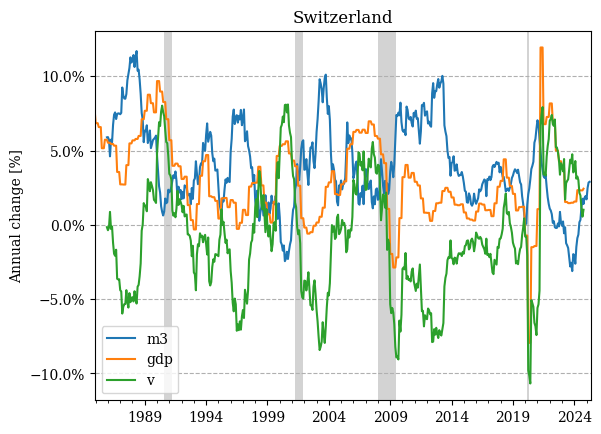

In [18]:
from data_preparation import get_ch_data

df_ch = get_ch_data()
fig, ax = plot_pct_change(df_ch, "Switzerland")

## United Kingdom

- M4x: LPMAUYN, Monthly amounts outstanding of M4 (monetary financial institutions' sterling M4 liabilities to private sector) (in sterling millions) seasonally adjusted [BoE](https://www.bankofengland.co.uk/boeapps/database/FromShowColumns.asp?Travel=NIxAZxI1x&FromCategoryList=Yes&NewMeaningId=LM4,LM4L&CategId=6&HighlightCatValueDisplay=M4).
- Gross Domestic Product at market prices: Current price: Seasonally adjusted £m, quarterly [ONS](https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/ybha/pn2).
- Inflation: CPI INDEX 00: ALL ITEMS 2015=100 [ONS](https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/d7bt/mm23).

/Users/miguel/workspace/money-growth/data_preparation.py:93: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(
/Users/miguel/workspace/money-growth/data_preparation.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  s_cpi = pd.read_csv(


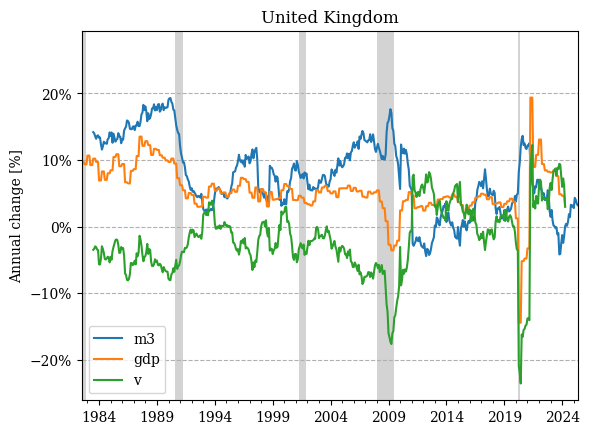

In [19]:
from data_preparation import get_uk_data

df_uk = get_uk_data()
fig, ax = plot_pct_change(df_uk, "United Kingdom")

## Japan

Data:
- M3: MD02'MAM1NAM3M3MO: M3/Average Amounts Outstanding/Money Stock [BoJ Time-Series Data Search](https://www.stat-search.boj.or.jp/ssi/mtshtml/md02_m_1_en.html).
- CPI: 
    - e-Stat: [2020-Base Consumer Price Index. Monthly Report. 2024Jul.](https://www.e-stat.go.jp/en/stat-search/files?page=1&layout=datalist&toukei=00200573&tstat=000001150147&cycle=1&year=20240&month=23070907&tclass1=000001150149&result_back=1&tclass2val=0)
    - Bank of Japan: [Measures of Underlying Inflation](https://www.boj.or.jp/en/research/research_data/cpi/index.htm).

Monetary aggregates reference: [Monetary Aggregates (market volume, outstanding)](https://www.boj.or.jp/en/statistics/outline/note/notest31.htm).

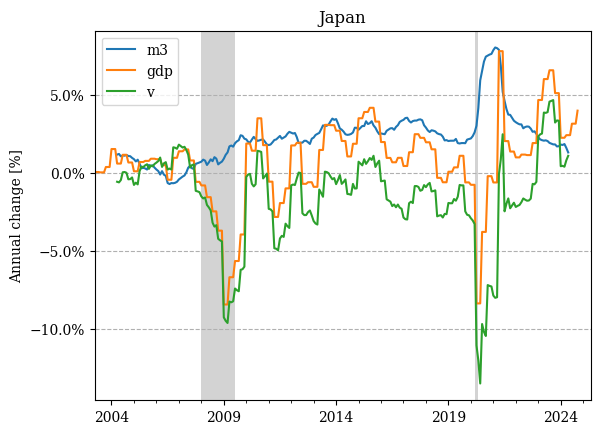

In [20]:
from data_preparation import get_jp_data

df_jp = get_jp_data()
fig, ax = plot_pct_change(df_jp, "Japan")

## Monetary aggregates in the U.S.

/var/folders/q8/gp6z9yks6ynf_34chydw0yrr0000gn/T/ipykernel_99382/58437570.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_us["m3"].pct_change(periods=12).plot(ax=ax, label="M3")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


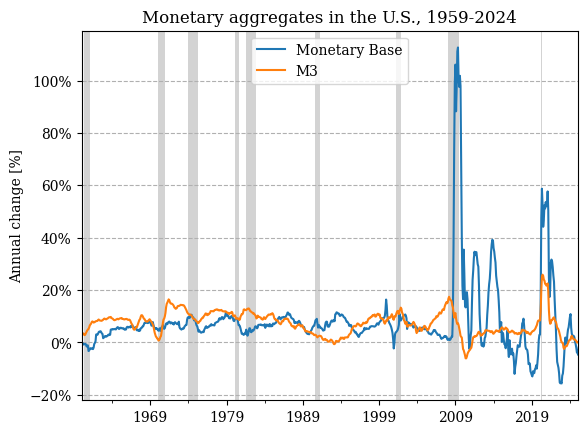

In [21]:
import pandas as pd
from fredapi import Fred

fred = Fred()

fig, ax = plt.subplots()

m0 = fred.get_series("BOGMBASE")
m0.pct_change(periods=12).plot(ax=ax, label="Monetary Base")
df_us["m3"].pct_change(periods=12).plot(ax=ax, label="M3")
# (df_us['m3']/m0*1e3).plot(ax=ax, secondary_y=True, label='multiplicador')
plot_recessions(ax)

ax.set_title("Monetary aggregates in the U.S., 1959-2024")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which="major", axis="y", linestyle="--")  #  or bothdd
ax.set_xlabel("")
ax.set_ylabel("Annual change [%]")
ax.legend()
ax.set_xlim(("1960", "2025"))

fig.savefig("figures/broad-vs-narrow-money.eps", bbox_inches="tight")
fig.savefig("figures/broad-vs-narrow-money.svg", bbox_inches="tight")

## Data export

In [22]:
df_us.to_pickle("data/us.pickle")
df_eu.to_pickle("data/eu.pickle")
df_ch.to_pickle("data/ch.pickle")
df_uk.to_pickle("data/uk.pickle")
df_jp.to_pickle("data/jp.pickle")